# 📘 Homework 4.0 - Clustering Analysis with Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
sns.set(style="whitegrid")


C:\Users\DELL\AppData\Local\Temp\ipykernel_27736\416738716.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')


The number of original missing values:
mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0

The total number of missing values after filling: 0
 Cluster-based statistics:
                mpg            displacement               horsepower  \
              mean        var         mean          var        mean   
cluster                                                               
0        27.365414  41.976309   131.934211  2828.083391   83.834615   
1        13.889062   3.359085   358.093750  2138.213294  167.046875   
2        17.510294   8.829892   278.985294  2882.492318  124.470588   

                          weight                acceleration             
                var         mean            var         mean        var  
cluster                                                                  
0        368.053623  2459.511278  182632.099872    16.298120   5.718298  
1        756.521577  4398.593750   74312.340278    13.025000   3.59

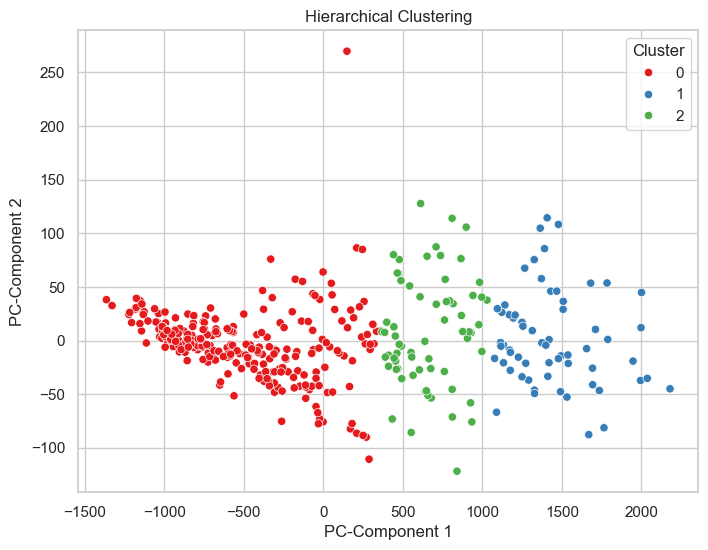

In [2]:
# Problem 1
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']

try:
    df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
except Exception as e:
    raise ConnectionError(f"Data loading failed, please check the network connection: {str(e)}")

cont_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_cont = df[cont_features]

print(f"The number of original missing values:\n{df_cont.isna().sum().to_string()}") 

imputer = SimpleImputer(strategy='mean')
df_cont_imputed = pd.DataFrame(imputer.fit_transform(df_cont), columns=cont_features)

print(f"\nThe total number of missing values after filling: {df_cont_imputed.isna().sum().sum()}")

clusterer = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = clusterer.fit_predict(df_cont_imputed)
df['cluster'] = clusters

cluster_stats = df.groupby('cluster')[cont_features].agg(['mean', 'var'])
origin_stats = df.groupby('origin')[cont_features].agg(['mean', 'var'])

print(" Cluster-based statistics:\n", cluster_stats)
print("\n Origin-based statistics:\n", origin_stats)

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_cont_imputed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette="Set1")
plt.title("Hierarchical Clustering")
plt.xlabel("PC-Component 1")
plt.ylabel("PC-Component 2")
plt.legend(title="Cluster")
plt.show()


 Best k: 2, Silhouette Score: 0.350


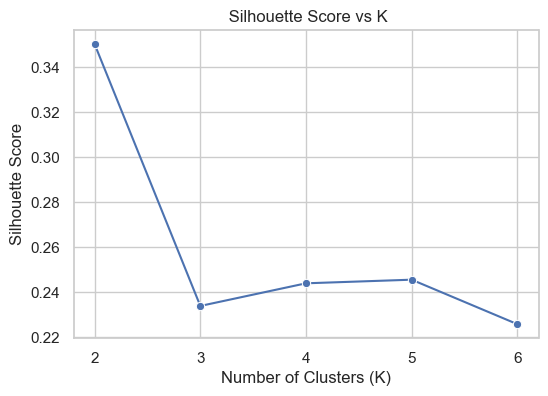

 Cluster Feature Means:
              crim         zn      indus      chas       nox        rm  \
cluster                                                                 
0        0.263946  17.477204   6.919818  0.069909  0.487215  6.456544   
1        9.839575   0.000000  18.975085  0.067797  0.680124  5.965096   

               age       dis        rad         tax    ptratio           b  \
cluster                                                                      
0        56.382067  4.751124   4.474164  302.209726  17.818237  386.643891   
1        91.238418  2.017920  18.983051  605.316384  19.640113  300.967345   

             lstat       medv  
cluster                        
0         9.417812  25.782067  
1        18.666610  16.493220  

 KMeans Centroids:
 [[-0.38980122  0.26239167 -0.61529402  0.00291182 -0.58291594  0.24491263
  -0.43358416  0.45449141 -0.58345172 -0.62972689 -0.29466201  0.32860027
  -0.45349747  0.35364132]
 [ 0.72454577 -0.48772236  1.14368211 -0.0054

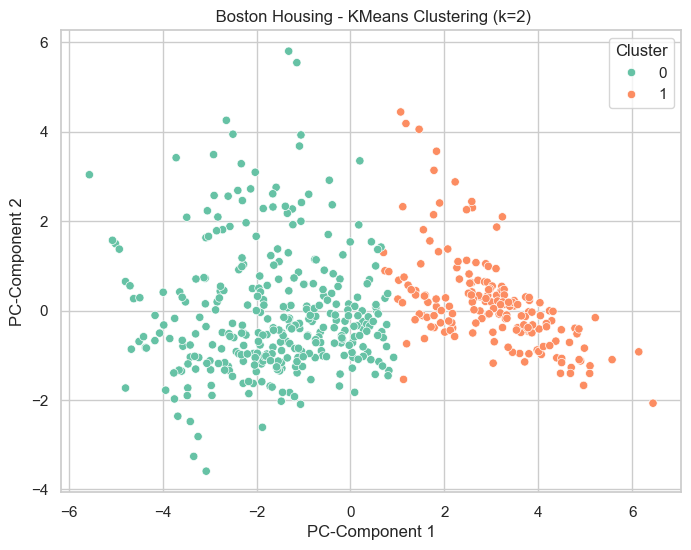

In [5]:
# Problem 2
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(data_url)

X_boston = StandardScaler().fit_transform(boston)
scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_boston)
    score = silhouette_score(X_boston, labels)
    scores.append((k, score))

best_k, best_score = max(scores, key=lambda x: x[1])
print(f" Best k: {best_k}, Silhouette Score: {best_score:.3f}")

# Silhouette score plot
plt.figure(figsize=(6, 4))
ks, score_vals = zip(*scores)
sns.lineplot(x=ks, y=score_vals, marker='o')
plt.title(" Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(ks)
plt.grid(True)
plt.show()

# Final clustering
kmeans_opt = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels_opt = kmeans_opt.fit_predict(X_boston)
boston['cluster'] = labels_opt
cluster_means = boston.groupby('cluster').mean()

print(" Cluster Feature Means:\n", cluster_means)
print("\n KMeans Centroids:\n", kmeans_opt.cluster_centers_)

# PCA Visualization
pca_boston = PCA(n_components=2)
X_boston_pca = pca_boston.fit_transform(X_boston)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_boston_pca[:, 0], y=X_boston_pca[:, 1], hue=boston['cluster'], palette="Set2")
plt.title(f" Boston Housing - KMeans Clustering (k={best_k})")
plt.xlabel("PC-Component 1")
plt.ylabel("PC-Component 2")
plt.legend(title="Cluster")
plt.show()


 Homogeneity Score: 0.879
 Completeness Score: 0.873


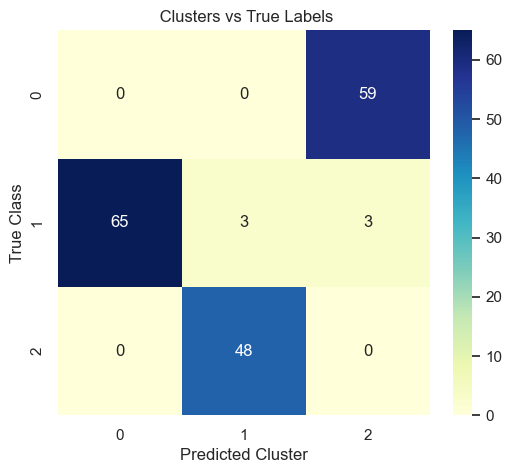

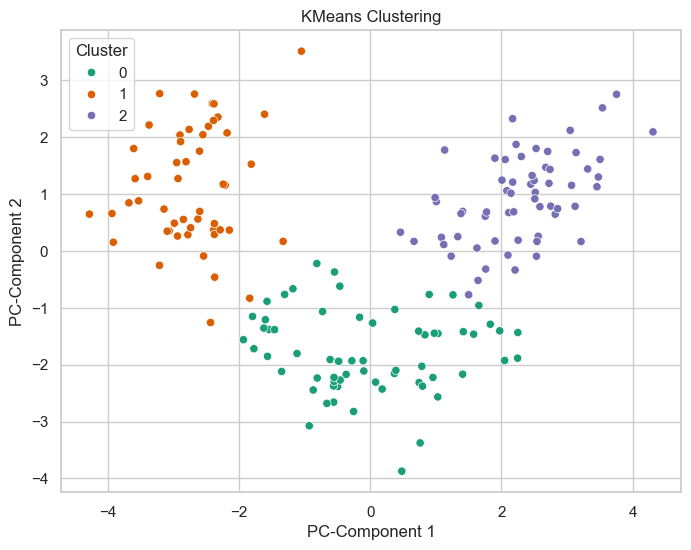

In [4]:
# Problem 3
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
true_labels = wine.target
kmeans_wine = KMeans(n_clusters=3, random_state=42, n_init='auto')
pred_labels = kmeans_wine.fit_predict(X_wine)
h_score = homogeneity_score(true_labels, pred_labels)
c_score = completeness_score(true_labels, pred_labels)
print(f" Homogeneity Score: {h_score:.3f}")
print(f" Completeness Score: {c_score:.3f}")

# Confusion matrix heatmap
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title(" Clusters vs True Labels")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Class")
plt.show()

# PCA Visualization
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_wine_pca[:, 0], y=X_wine_pca[:, 1], hue=pred_labels, palette="Dark2")
plt.title("KMeans Clustering")
plt.xlabel("PC-Component 1")
plt.ylabel("PC-Component 2")
plt.legend(title="Cluster")
plt.show()
